In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
load_df = datasets.fetch_california_housing()
print(load_df.DESCR)

data = pd.DataFrame(load_df.data)
feature = pd.DataFrame(load_df.feature_names)
data.columns = feature[0]
target = pd.DataFrame(load_df.target)
target.columns = ["target"]
df = pd.concat([data, target], axis=1)
print(df.shape)
df.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.info() # no-null
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

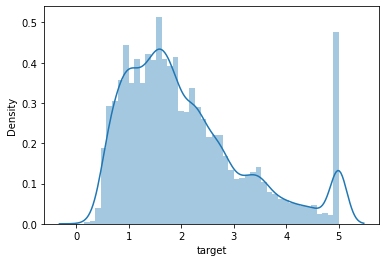

In [4]:
import seaborn as sns

sns.distplot(df['target'])

<AxesSubplot:xlabel='target'>

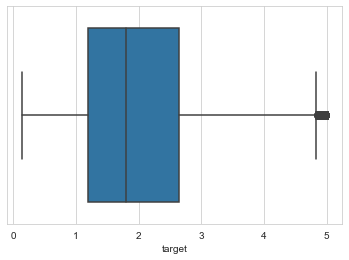

In [5]:
sns.set_style("whitegrid")
sns.boxplot(x="target", data=df)

In [6]:
df["target"].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

In [7]:
from sklearn.preprocessing import KBinsDiscretizer

# trans= KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')
# target_ = trans.fit_transform(target)
# df["target"] = target_

# trans.bin_edges_

trans= KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
target_ = trans.fit_transform(target)
df["target"] = target_

trans.bin_edges_

array([array([0.14999   , 1.414     , 2.30333333, 5.00001   ])],
      dtype=object)

<AxesSubplot:>

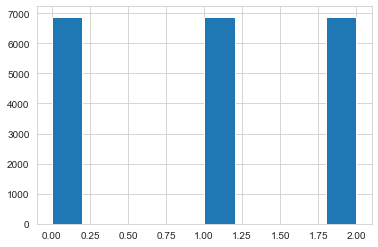

In [9]:
df['target'].hist()

<AxesSubplot:>

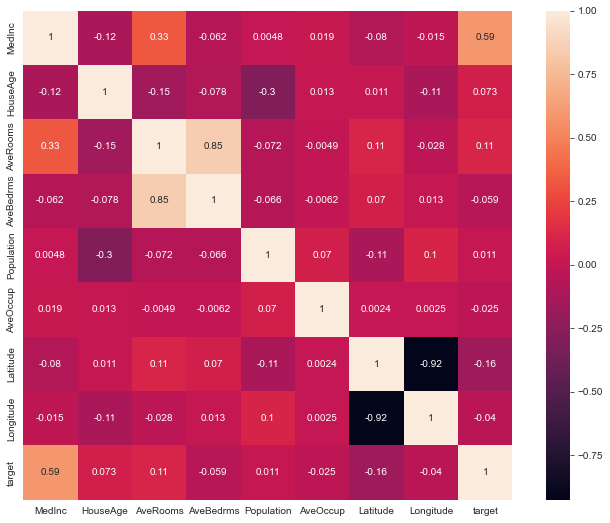

In [10]:
import matplotlib.pyplot as plt

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

In [11]:
data = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Longitude","Latitude"]]
feature = df["target"]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(data, feature, test_size=0.3, random_state=5)

DT_MODEL = DecisionTreeClassifier(random_state=5)
DT_MODEL.fit(X_train, y_train)
prediction=DT_MODEL.predict(X_test)

print('Training accuracy : ', DT_MODEL.score(X_train, y_train))
print('Testing accuracy : ', DT_MODEL.score(X_test, y_test))

Training accuracy :  1.0
Testing accuracy :  0.7370801033591732


In [13]:
path=DecisionTreeClassifier(random_state=5).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

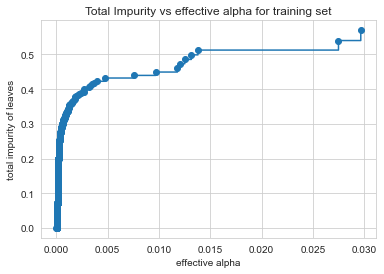

In [14]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=5,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [16]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}"
.format(clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09699706743766245 and a depth of: 0


In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

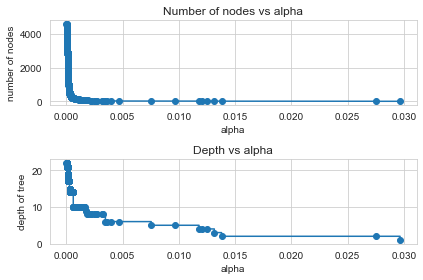

In [18]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

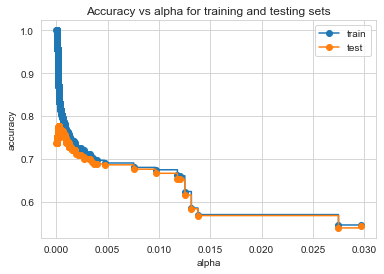

In [19]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [20]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

prediction=best_model.predict(X_test)

Training accuracy of best model:  0.8561046511627907
Test accuracy of best model:  0.7777777777777778


In [21]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

CM = confusion_matrix(y_test, prediction)
CM_report=classification_report(y_test, prediction)

print('-'*15, 'Confusion Matrix', '-'*15)
CM_rename = pd.DataFrame(CM).rename(index={0 : 'real(low $)', 1 : 'real(mid $))', 2 : 'real(high $)'},
                                    columns={0 : 'pred(low $)', 1 : 'pred(mid $)', 2 : 'pred(high $)'})
print(CM_rename)
print('-'*20, '성능평가', '-'*20)
print(CM_report)

--------------- Confusion Matrix ---------------
              pred(low $)  pred(mid $)  pred(high $)
real(low $)          1698          295            52
real(mid $))          309         1421           317
real(high $)           50          353          1697
-------------------- 성능평가 --------------------
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      2045
         1.0       0.69      0.69      0.69      2047
         2.0       0.82      0.81      0.81      2100

    accuracy                           0.78      6192
   macro avg       0.78      0.78      0.78      6192
weighted avg       0.78      0.78      0.78      6192



MedInc. 0.376
HouseAge. 0.029
AveRooms. 0.050
AveBedrms. 0.014
Population. 0.014
AveOccup. 0.115
Latitude. 0.199
Longitude. 0.203


<AxesSubplot:>

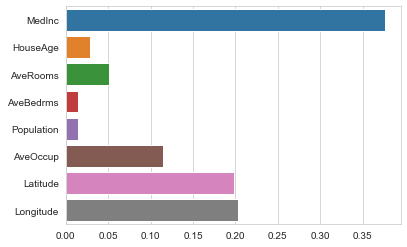

In [22]:
for name, value in zip(load_df.feature_names, best_model.feature_importances_):
  print('{0}. {1:.3f}'.format(name, value))

sns.barplot(x=best_model.feature_importances_, y=load_df.feature_names)

In [23]:
load_df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

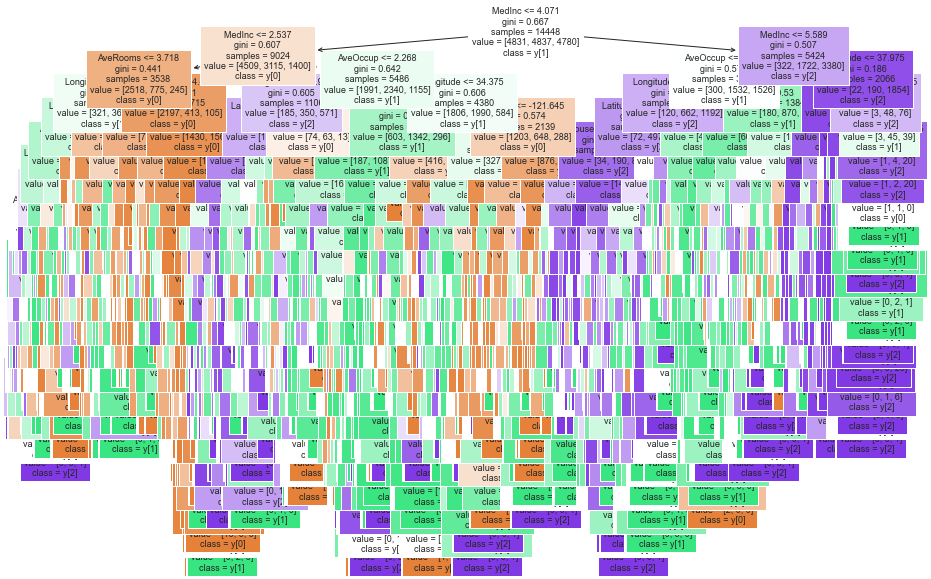

In [25]:
plt.figure(figsize=(15, 10))
plot_tree(DT_MODEL, feature_names=load_df.feature_names, class_names=True, filled=True, fontsize=9)
plt.show()

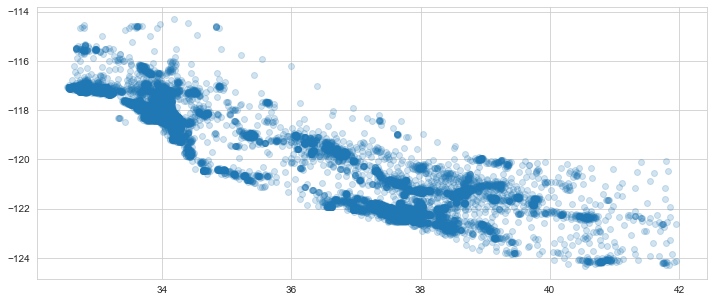

In [26]:
f, ax = plt.subplots(figsize=(12, 5))
plt.scatter(df['Latitude'], df['Longitude'], alpha=0.2)